In [83]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

import pickle
import pandas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.cross_validation import cross_val_predict, cross_val_score, StratifiedKFold
import numpy as np 
from scipy.stats import pearsonr
from sklearn.ensemble import BaggingRegressor

In [84]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
feature_sets = []
targets = []
for i in combos:
    feature_sets.append( i[ 0 ] ) 
    targets.append( i[ 1 ] ) 
    
n_feature_sets = len( set( feature_sets ) ) 
n_targets = len( set( targets ) ) 
n_feature_sets, n_targets

(7, 5)

## Comparison of the performance of 7 feature sets in predicting experimental targets T$_m$, _k_<sub>cat</sub>, K<sub>M</sub>, _k_<sub>cat</sub>/K<sub>M</sub>

Here, we compare the performance of elastic net using each of 6 feature sets, ranging in number of features from 17 to 60.

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


KeyboardInterrupt: 

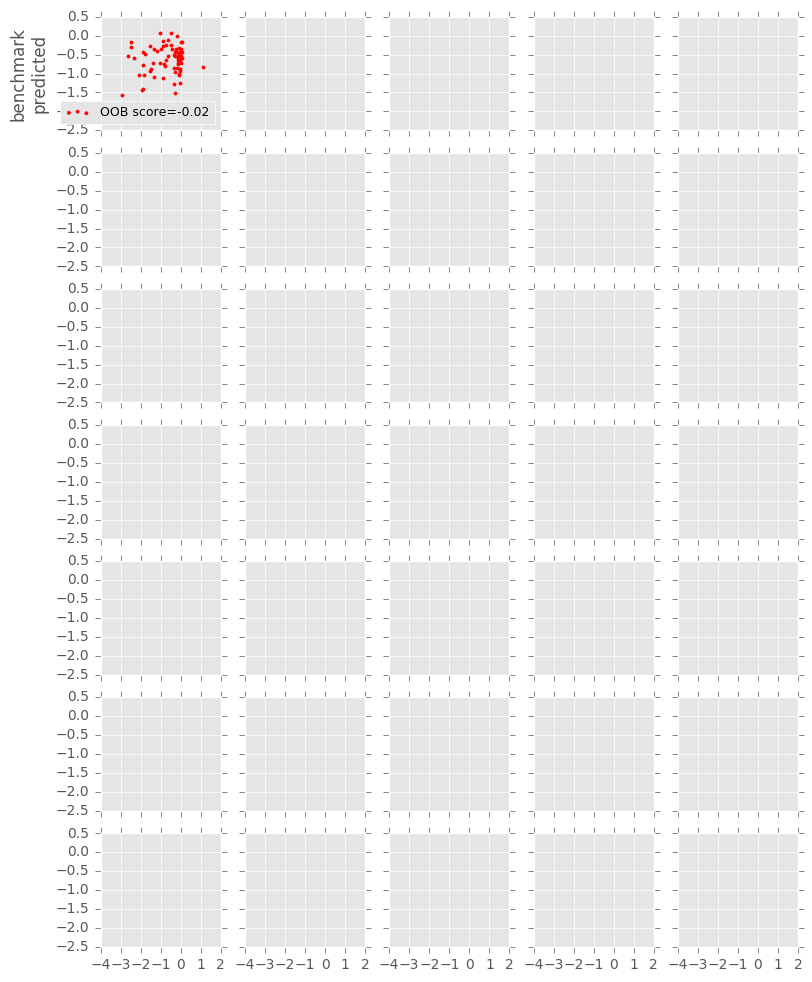

In [85]:
fig, ax = plt.subplots( nrows=n_feature_sets, ncols=n_targets, figsize=(9,12), sharex=True, sharey=True )
for i, ( name, target, X, y, support ) in enumerate( combos ):
    # fit 
    skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
    net = ElasticNetCV( cv=skf, max_iter=1e9, selection='random' ) 
    bag = BaggingRegressor( net, n_estimators=1000, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 

    # plot 
    fig.axes[ i ].scatter( y, bag.oob_prediction_, marker='.', color='red', alpha=1 )
    fig.axes[ i ].legend( [ 'OOB score={0:.2f}'.format( bag.oob_score_ ) ], loc='lower right', fontsize='9' ) 
    if i % n_targets == 0:
        fig.axes[ i ].set_ylabel( '{}\npredicted'.format( name ) ) 
    if i >= len( fig.axes ) - n_targets:
        fig.axes[ i ].set_xlabel( '{}\nmeasured'.format( target ) ) 

fig.tight_layout()
fig.show()